In [1]:
from subprocess import call
import numpy as np
import matplotlib.pyplot as plt

from collections import namedtuple

In [2]:
def simulation(progName, nGames=10, depth=4):

    
    fileName = "results.txt"
    #To store the timing values (means) for a specific depth
    oldMeanPerDepth = []
    newMeanPerDepth = []

    #To store the number of nodes visited from root until a specific depth
    oldNodeNumPerDepth = []
    newNodeNumPerDepth = []

    #To store the timing values (means) for all depths [THose that are going to be used for plottig]
    oldGlobalMean = []
    newGlobalMean = []

    #To store the number of noes visited for all depths [THose that are going to be used for plottig]
    oldNodeNum = []
    newNodeNum = []

     #the result
    stats = namedtuple("Stats", ["oldGlobalMean", "newGlobalMean", "oldNodeNum", "newNodeNum"])

    #generate all the possible depths
    depths = range(1, depth + 1)

    for h in depths:
        for g in range(nGames):
            retCode = call([progName, str(h)])
            with open(fileName, "r") as f: #filename is the file path to the file generated by the chess engine written in C
                #first two lines in the file represent the number of nodes visited for both the first algorithm aand the second one respectively
                oldNodeNumPerDepth.append(float(f.readline().strip(" ")))
                newNodeNumPerDepth.append(float(f.readline().strip(" ")))

                #we calculate for each depth, for each game the mean of the time taken by one program to perform a move
                old = list(map(float, f.readline().strip().split()))
                new = list(map(float, f.readline().strip().split()))
                oldMeanPerDepth.append(sum(old) / len(old))
                newMeanPerDepth.append(sum(new) / len(new))

        #we assigne the infomation relative to each depth to the global lists
        oldGlobalMean.append(sum(oldMeanPerDepth) / len(oldMeanPerDepth))
        newGlobalMean.append(sum(newMeanPerDepth) / len(newMeanPerDepth))
        oldNodeNum.append(int(sum(oldNodeNumPerDepth) / len(oldNodeNumPerDepth)))
        newNodeNum.append(int(sum(newNodeNumPerDepth) / len(newNodeNumPerDepth)))
        oldMeanPerDepth  = []
        newMeanPerDepth = []
        oldNodeNumPerDepth = []
        newNodeNumPerDepth = []

    #assign everything to the named tuple 
    stats.oldGlobalMean = oldGlobalMean
    stats.newGlobalMean = newGlobalMean
    stats.oldNodeNum = oldNodeNum
    stats.newNodeNum = newNodeNum
    return stats


The above function runs the C code simulation, gets the generated statistics from a text file, calculates the appropriate means and returns those stats in a named tuple.
The following function plots these stats:

In [3]:
def plotting(stats, old_name, new_name, depth=4):
    
    #generate all the possible depths
    depths = range(1, depth + 1)

    #Only for plotting purposes
    offset = 0.2
    figure = plt.subplot(121)
    figure.bar(np.array(depths) - offset, stats.oldGlobalMean, width=2*offset, color="lime")
    figure.bar(np.array(depths) + offset, stats.newGlobalMean, width=2*offset, color="cyan")
    plt.xlabel("Depth")
    plt.ylabel("Execution time (s)")
    plt.legend([old_name, new_name])

    figure = plt.subplot(122)
    figure.bar(np.array(depths) - offset, stats.oldNodeNum, width=2*offset, color="lime")
    figure.bar(np.array(depths) + offset, stats.newNodeNum, width=2*offset, color="cyan")
    plt.xlabel("Depth")
    plt.ylabel("Visited nodes")
    plt.legend([old_name, new_name])
    plt.show()
    plt.close()

To run the simulation, we'll specify the C program name for the simulate function. The code to compile that program is on the repository. Our first C program makes the sequential engine play against the parallel one.
Let's go with 3 full games at depth 4:

In [5]:
stats = simulation("a.exe", nGames=3)

And we plot the results:

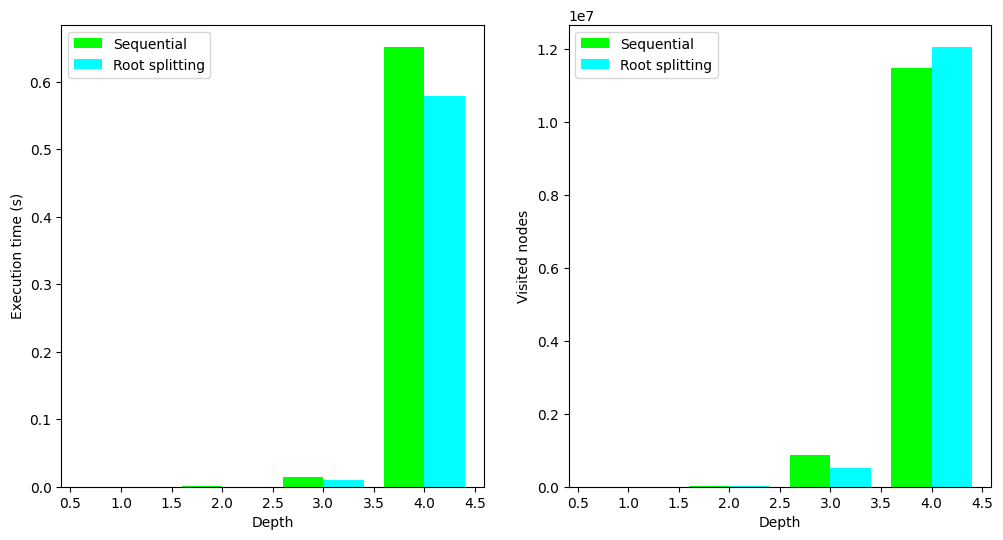

In [6]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6) 

plotting(stats, "Sequential", "Root splitting")


The parallel seems to be clearly faster at depths 3 and 4, even if the number of visited nodes is slightly higher for the parallel engine.